In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False
...,...,...,...,...,...
1333,50,30.970,3,True,False
1334,18,31.920,0,False,False
1335,18,36.850,0,False,False
1336,21,25.800,0,False,False


In [6]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent, dependent, test_size=0.30, random_state=42)

In [8]:
from sklearn.ensemble import AdaBoostRegressor
regressor=AdaBoostRegressor(n_estimators=50, loss="linear", random_state=42)
regressor.fit(X_train,Y_train)

C:\dell\envs\aiml\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(random_state=42)

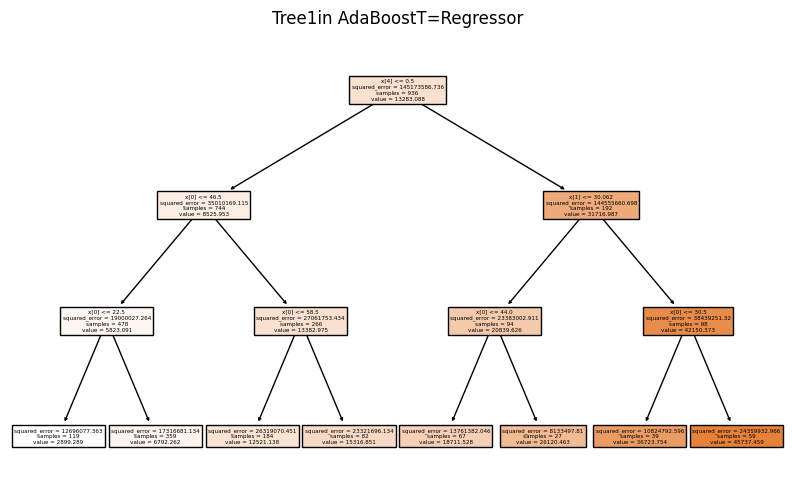

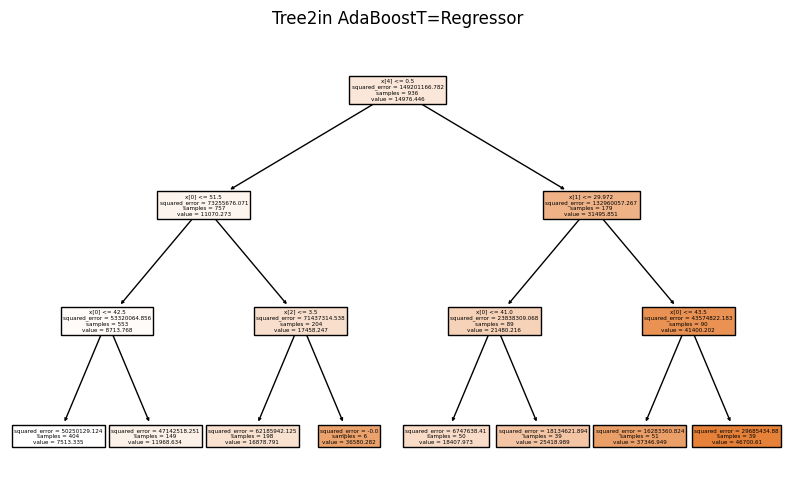

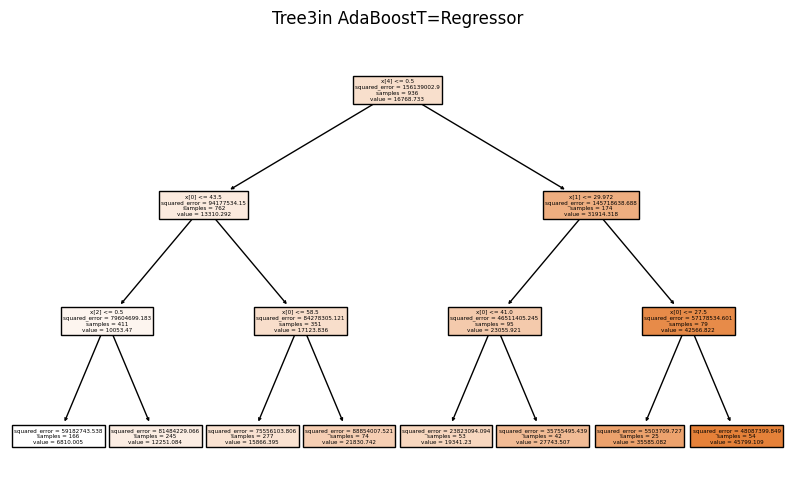

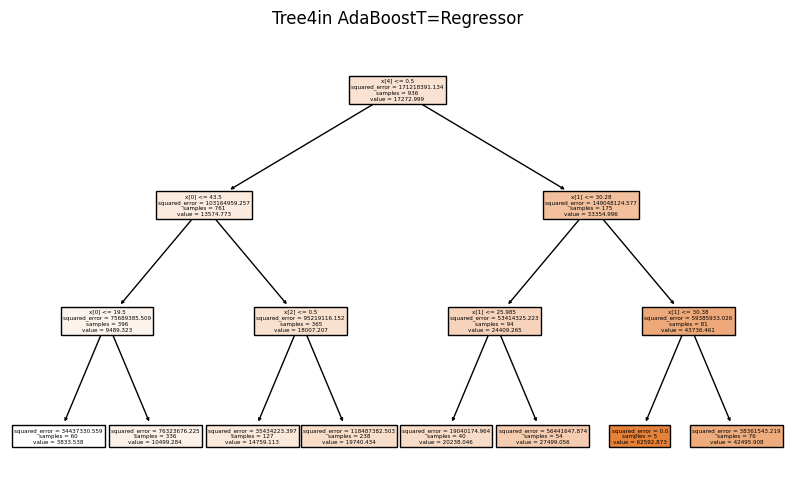

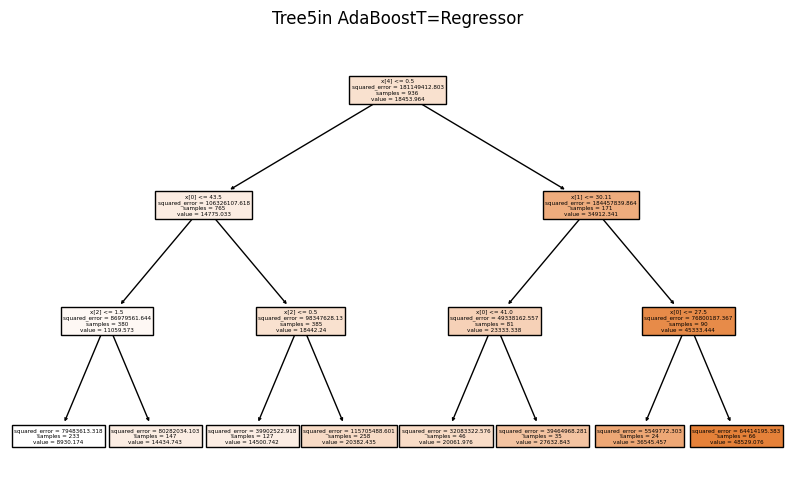

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree
for i, estimator in enumerate(regressor.estimators_[:5]):
    plt.figure(figsize=(10,6))
    tree.plot_tree(estimator, filled=True)
    plt.title(f"Tree{i+1}in AdaBoostT=Regressor")
    plt.show()

In [12]:
regressor.estimators_

[DecisionTreeRegressor(max_depth=3, random_state=1608637542),
 DecisionTreeRegressor(max_depth=3, random_state=1385487173),
 DecisionTreeRegressor(max_depth=3, random_state=1463308375),
 DecisionTreeRegressor(max_depth=3, random_state=1331439587),
 DecisionTreeRegressor(max_depth=3, random_state=702328500),
 DecisionTreeRegressor(max_depth=3, random_state=1561154508),
 DecisionTreeRegressor(max_depth=3, random_state=826751807)]

In [13]:
regressor.estimator_weights_

array([2.05989988, 1.23799664, 0.55301899, 0.31181479, 0.3438419 ,
       0.01889641, 0.18450299, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [14]:
regressor.estimator_errors_

array([0.11305587, 0.22478489, 0.36516427, 0.42267183, 0.41487654,
       0.49527604, 0.45400466, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [15]:
Y_pred=regressor.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_pred,Y_test)
r_score

0.8203920789934109